# TP 3 - Métodos No Paramétricos

## Ejercicio 0

* _Muestrear una gaussiana estandar y aproximar mediante Ventanas de Parzen y Vecino Más Cercano_

## Comentarios

Como función ventana también utilizo una normal estándar.

In [1]:
clc;

## Benchmarks

* La función de muestreo *stdnormal_pdf* es ~10 veces más rápido que *normpdf*
* El algoritmo vectorial es zarpadamente más rápido que el iterativo
 * Iterativo: 1000 muestras -> 120 segundos 
 * Vectorial: 100000 muestras -> 15 segundos

## Experimentación

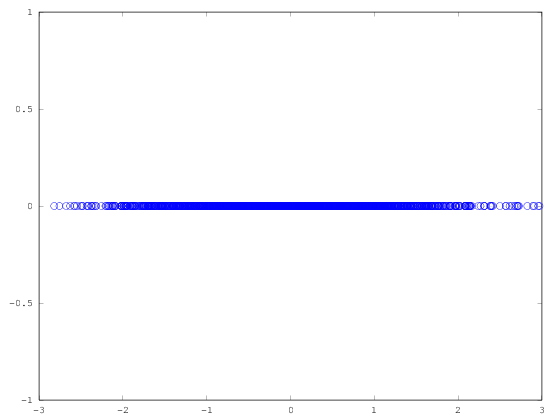

In [30]:
NSAMPLES = 2000;

D = stdnormal_rnd([NSAMPLES 1]);
Dt = D';
n = length(D);

scatter(D, zeros([NSAMPLES 1]), 20);
xlim([-3, 3]);

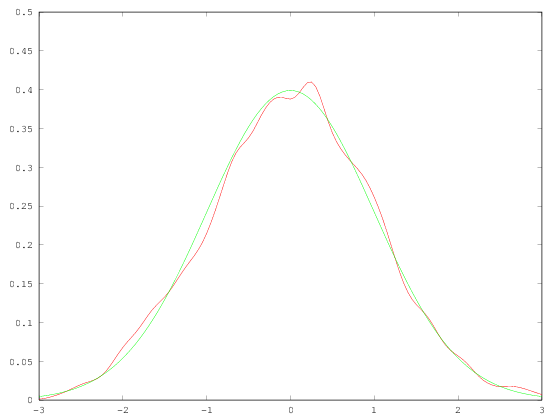

Time: 1.464259147644043 seconds.



In [32]:
%%time
DELTA = 0.05;

function res = window_height(n)
  res = 1/log(n);
endfunction

h_n = window_height(n);

x_est = -3:DELTA:3;
y_est = zeros(size(x_est));
for sample = Dt
  y_est += stdnormal_pdf((x_est - sample) / h_n) / h_n;
end
y_est /= length(Dt);

x_ideal = x_est;
y_ideal = [];
for j = 1:length(x_ideal)
  y_ideal(j) = stdnormal_pdf(x_ideal(j));
end
  
hold on;
plot(x_est, y_est, "r");
plot(x_ideal, y_ideal, "g");

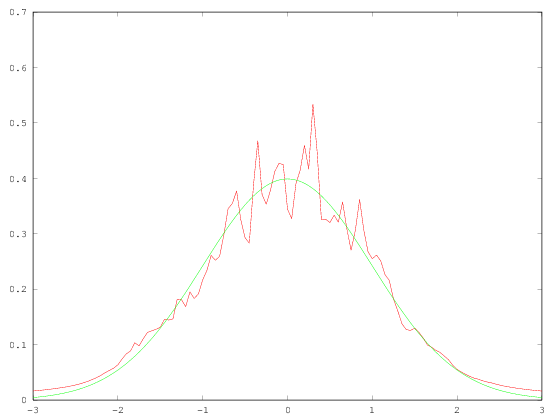

Time: 32.604570388793945 seconds.



In [31]:
%%time
DELTA = 0.05;

function res = neighbour_quantity(n)
  res = min(n, 10 * ceil(log(n)));
endfunction

function f = aproxpdf(x, Dt, k)

endfunction

k_n = neighbour_quantity(n);

% For calculating V from K, I iterate over samples supposing
% the edge of the sphere is each of them (I take the minimum
% radius which encloses >=k samples)
x_est = -3:DELTA:3;
y_est = [];
for j = 1:length(x_est)
  set = 0;
  min_radius = 0;
  
  for sample = Dt
    radius = abs(sample - x_est(j));
    count = sum(abs(Dt - x_est(j)) <= radius + 1e-5); 
    if count >= k_n
      if !set || radius < min_radius
        min_radius = radius;
        set = 1;
      end
    end
  end
  
  y_est(j) =  k_n / (length(Dt) * (min_radius * 2));
end

x_ideal = x_est;
y_ideal = [];
for j = 1:length(x_ideal)
  y_ideal(j) = stdnormal_pdf(x_ideal(j));
end
  
hold on;
plot(x_est, y_est, "r");
plot(x_ideal, y_ideal, "g");